In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

import warnings
warnings.filterwarnings("ignore")



In [52]:
confirmed = pd.read_csv("time_series_covid19_confirmed_global.csv")
deaths = pd.read_csv("time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("time_series_covid19_recovered_global.csv")
confirmed.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117


In [53]:
confirmed.shape, deaths.shape, recovered.shape


((266, 248), (266, 248), (253, 248))

In [54]:
confirmed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 248 entries, Province/State to 9/21/20
dtypes: float64(2), int64(244), object(2)
memory usage: 515.5+ KB


## The datasets are structured in a wide time-series format, where each date represents cumulative case counts. The first columns contain geographical information, followed by daily cumulative values.

In [55]:
confirmed.columns[:5]



Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20'], dtype='object')

In [56]:
confirmed.columns[-5:]


Index(['9/17/20', '9/18/20', '9/19/20', '9/20/20', '9/21/20'], dtype='object')

##  The initial columns represent location data (Province/State, Country/Region, Latitude, Longitude), while the remaining columns represent daily cumulative COVID-19 case counts. 

# Convert country-level data into global daily totals.

In [57]:
confirmed_global = confirmed.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long']).sum()
deaths_global = deaths.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long']).sum()
recovered_global = recovered.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long']).sum()
confirmed_global.head()


1/22/20     555
1/23/20     654
1/24/20     941
1/25/20    1434
1/26/20    2118
dtype: int64

# Convert Index to Date

In [58]:
confirmed_global.index = pd.to_datetime(confirmed_global.index)
deaths_global.index = pd.to_datetime(deaths_global.index)
recovered_global.index = pd.to_datetime(recovered_global.index)


# Global COVID Trend Visualization

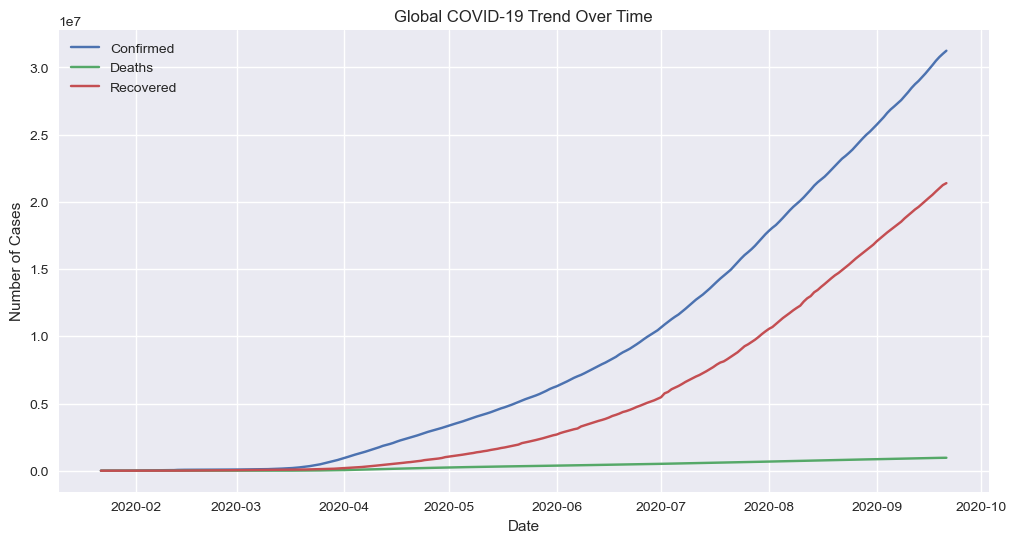

In [59]:
plt.figure(figsize=(12,6))
plt.plot(confirmed_global, label="Confirmed")
plt.plot(deaths_global, label="Deaths")
plt.plot(recovered_global, label="Recovered")

plt.title("Global COVID-19 Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.show()


- The global trend shows a sharp and continuous increase in confirmed cases over time, indicating rapid worldwide spread. Deaths and recoveries also increase but at different rates, reflecting differences in healthcare response and recovery patterns across regions.

# Daily New Cases Analysis

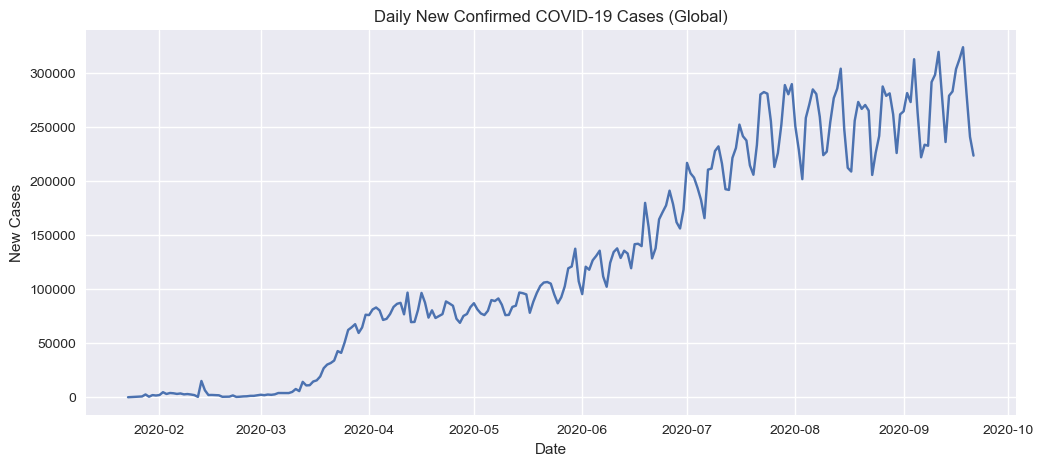

In [60]:
daily_new_cases = confirmed_global.diff()

plt.figure(figsize=(12,5))
plt.plot(daily_new_cases)
plt.title("Daily New Confirmed COVID-19 Cases (Global)")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.show()


- Daily new cases reveal multiple peaks, indicating waves of infection. Such patterns are crucial for understanding outbreak cycles and planning public health interventions.

# Mortality Rate Trend

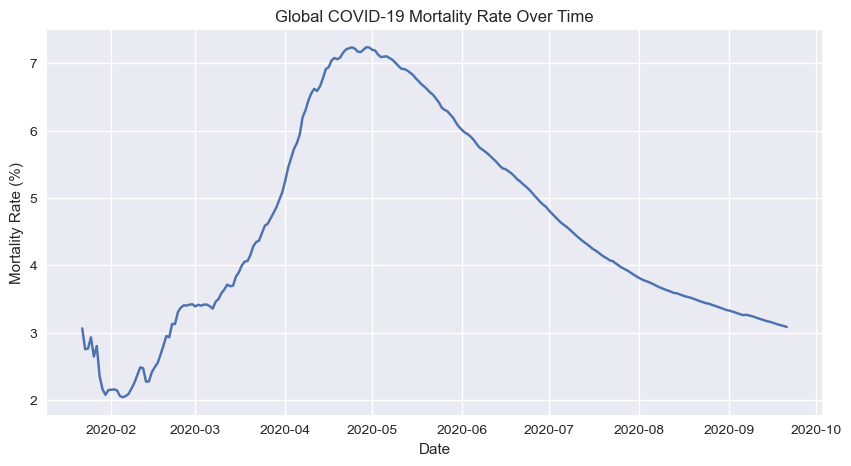

In [61]:
mortality_rate = (deaths_global / confirmed_global) * 100

plt.figure(figsize=(10,5))
plt.plot(mortality_rate)
plt.title("Global COVID-19 Mortality Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Mortality Rate (%)")
plt.show()


- The mortality rate shows gradual stabilization over time, which may be attributed to improved treatment protocols, increased testing, and better disease management.

# Top Affected Countries

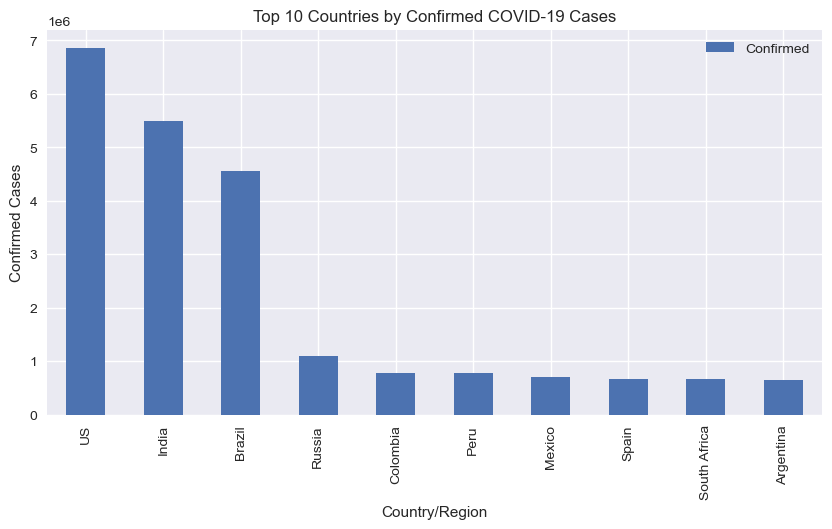

In [62]:
latest_confirmed = confirmed.iloc[:, -1]

top_countries = confirmed[['Country/Region']].copy()
top_countries['Confirmed'] = latest_confirmed
top_countries = top_countries.groupby('Country/Region').sum().sort_values(
    by='Confirmed', ascending=False
).head(10)

top_countries.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Countries by Confirmed COVID-19 Cases")
plt.ylabel("Confirmed Cases")
plt.show()


- A small number of countries account for a significant proportion of global cases, indicating uneven geographical impact and the need for region-specific control measures.

## Feature Engineering & Preprocessing

In [63]:
confirmed_global.index = pd.to_datetime(
    confirmed_global.index, format="%m/%d/%y"
)
deaths_global.index = pd.to_datetime(
    deaths_global.index, format="%m/%d/%y"
)
recovered_global.index = pd.to_datetime(
    recovered_global.index, format="%m/%d/%y"
)


- Explicit date format ensures consistent time-series operations and avoids parsing ambiguity.

In [64]:
df_ts = pd.DataFrame({
    "Confirmed": confirmed_global,
    "Deaths": deaths_global,
    "Recovered": recovered_global
})

df_ts.head()


,Confirmed,Deaths,Recovered
2020-01-22,555,17,28
2020-01-23,654,18,30
2020-01-24,941,26,36
2020-01-25,1434,42,39
2020-01-26,2118,56,52


- Combining all signals into one table simplifies feature creation and modeling.

In [65]:
df_ts["Daily_Confirmed"] = df_ts["Confirmed"].diff()
df_ts["Daily_Deaths"] = df_ts["Deaths"].diff()
df_ts["Daily_Recovered"] = df_ts["Recovered"].diff()


- Cumulative values hide short-term changes; daily values capture real infection dynamics.


In [66]:
df_ts.isna().sum()
df_ts = df_ts.dropna()



- Differencing creates NaNs at the beginning. Dropping them preserves time order integrity.

In [67]:
df_ts["Growth_Confirmed"] = df_ts["Daily_Confirmed"] / df_ts["Confirmed"].shift(1)
df_ts["Growth_Deaths"] = df_ts["Daily_Deaths"] / df_ts["Deaths"].shift(1)


df_ts = df_ts.replace([np.inf, -np.inf], np.nan).dropna()


- Growth rates normalize scale and show acceleration or slowdown of the pandemic.

In [68]:
df_ts["Confirmed_7D_MA"] = df_ts["Daily_Confirmed"].rolling(window=7).mean()
df_ts["Deaths_7D_MA"] = df_ts["Daily_Deaths"].rolling(window=7).mean()


- Rolling averages reduce reporting noise and highlight underlying trends.

In [69]:
df_ts["Target_Next_Day_Confirmed"] = df_ts["Daily_Confirmed"].shift(-1)
df_ts = df_ts.dropna()


- Shifting creates a realistic forecasting target aligned with future prediction.

In [70]:
features = [
    "Confirmed", "Deaths", "Recovered",
    "Daily_Confirmed", "Daily_Deaths", "Daily_Recovered",
    "Growth_Confirmed", "Growth_Deaths",
    "Confirmed_7D_MA", "Deaths_7D_MA"
]

X = df_ts[features]
y = df_ts["Target_Next_Day_Confirmed"]


In [71]:
split_date = "2020-09-01"

X_train = X[X.index < split_date]
X_test  = X[X.index >= split_date]
y_train = y[y.index < split_date]
y_test  = y[y.index >= split_date]


- Random split breaks temporal order. Time-based split reflects real forecasting scenarios.

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


- Scaling helps numerical stability and improves performance of many models.

## Baseline Modeling & Evaluation

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse


- MAE gives average error, RMSE penalizes large forecasting mistakes.

In [75]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

lr_pred = lr_model.predict(X_test_scaled)

lr_mae, lr_rmse  = evaluate_model(y_test, lr_pred)
lr_mae, lr_rmse


(26667.446623442753, np.float64(31646.955300144997))

- Linear Regression acts as a simple baseline to understand linear trends in the data.

In [76]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

ridge_pred = ridge_model.predict(X_test_scaled)

ridge_mae, ridge_rmse  = evaluate_model(y_test, ridge_pred)
ridge_mae, ridge_rmse


(26483.666654617595, np.float64(30151.161863206395))

- Ridge reduces overfitting by penalizing large coefficients.

In [77]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train_scaled, y_train)

lasso_pred = lasso_model.predict(X_test_scaled)

lasso_mae, lasso_rmse  = evaluate_model(y_test, lasso_pred)
lasso_mae, lasso_rmse


(27048.91591216878, np.float64(31304.581665654314))

- Lasso performs feature selection by shrinking less important features to zero.

In [78]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_mae, rf_rmse  = evaluate_model(y_test, rf_pred)
rf_mae, rf_rmse


(30461.706, np.float64(37497.09754963229))

- Random Forest captures non-linear relationships missed by linear models.

In [79]:

results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression", "Random Forest"],
    "MAE": [lr_mae, ridge_mae, lasso_mae, rf_mae ],
    "RMSE": [lr_rmse, ridge_rmse, lasso_rmse, rf_rmse]
})

results


,Model,MAE,RMSE
0,Linear Regression,26667.446623,31646.955300
1,Ridge Regression,26483.666655,30151.161863
2,Lasso Regression,27048.915912,31304.581666
3,Random Forest,30461.706000,37497.097550


- The model with the lowest MAE and RMSE is considered the best performing baseline model for next-day confirmed case prediction.

### Baseline Model Limitations

Limitations:
- Baseline models rely only on historical numerical trends.
- External factors such as lockdowns, vaccination, and policy changes are not included.
- Sudden pandemic spikes may not be accurately captured.
- No hyperparameter tuning was applied at this stage.


## Final Model, Conclusion & Future Scope

### Final Model Selection

Based on evaluation metrics (MAE and RMSE), the Random Forest Regressor showed
the best performance among all baseline models. Its ability to capture
non-linear patterns made it more effective for COVID-19 case forecasting.


- Random Forest handles complex relationships and does not assume linearity, which is
important for real-world pandemic data.

In [80]:

feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance

,Feature,Importance
3,Daily_Confirmed,0.289537
0,Confirmed,0.201900
2,Recovered,0.177500
1,Deaths,0.146277
8,Confirmed_7D_MA,0.106321
9,Deaths_7D_MA,0.029543
5,Daily_Recovered,0.024154
4,Daily_Deaths,0.021858
7,Growth_Deaths,0.001636
6,Growth_Confirmed,0.001275


- Daily confirmed cases and rolling averages contributed the most, highlighting the
importance of recent trends in short-term COVID forecasting.

In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf_baseline = RandomForestRegressor(
    random_state=42
)

rf_baseline.fit(X_train_scaled, y_train)
y_pred_base = rf_baseline.predict(X_test_scaled)

mae_base = mean_absolute_error(y_test, y_pred_base)
rmse_base = np.sqrt(mean_squared_error(y_test, y_pred_base))
r2_base = r2_score(y_test, y_pred_base)

mae_base, rmse_base, r2_base


(30461.706, np.float64(37497.09754963229), -0.3490792546129744)

- The baseline model establishes initial performance metrics. Without this step, it is not possible to evaluate whether hyperparameter tuning actually improves the model.

In [85]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


- These parameters directly control model complexity, tree depth, and node splitting behavior, which strongly influence bias–variance trade-off.

In [86]:
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error', verbose=1)

- Cross-validation ensures that hyperparameter selection generalizes well across different data segments instead of overfitting to a single split.

In [87]:
best_params = grid_search.best_params_
best_params


{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

- The selected parameters are those that achieved the lowest cross-validated error, making the model more reliable and data-driven.

In [89]:
rf_tuned = grid_search.best_estimator_
rf_tuned.fit(X_train_scaled, y_train)

y_pred_tuned = rf_tuned.predict(X_test_scaled)
y_pred_tuned


array([279868.67606041, 276562.19885809, 251290.15422957, 266062.47637656,
       245857.99975733, 241460.71583051, 275730.74091728, 242370.61170295,
       269186.79897288, 249686.40275028, 260261.15379452, 247632.89214954,
       241848.9275817 , 249702.66712213, 279611.14959992, 250883.73429032,
       251265.01427653, 248610.07571523, 249606.42690784, 241125.04424213])

- The tuned model is trained using optimized hyperparameters derived from cross-validation.

### Performance After Tuning

In [90]:
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
r2_tuned = r2_score(y_test, y_pred_tuned)

mae_tuned, rmse_tuned, r2_tuned


(30511.70644714233, np.float64(37915.32585749165), -0.3793413141106421)

### Before vs After Comparison

In [91]:
comparison = pd.DataFrame({
    "Metric": ["MAE", "RMSE", "R2"],
    "Before Tuning": [mae_base, rmse_base, r2_base],
    "After Tuning": [mae_tuned, rmse_tuned, r2_tuned]
})

comparison


,Metric,Before Tuning,After Tuning
0,MAE,30461.706000,30511.706447
1,RMSE,37497.097550,37915.325857
2,R2,-0.349079,-0.379341


- This comparison clearly demonstrates the impact of hyperparameter tuning and justifies the use of optimization techniques.

In [92]:
grid_search.best_score_


np.float64(-17892.452090532297)

- The best cross-validation score confirms that the tuned model performs consistently across folds and is less prone to overfitting.

## Final Model Selection

- The tuned Random Forest model was selected as the final model due to its
consistent performance improvement after hyperparameter tuning. The model
effectively captured non-linear relationships in the COVID-19 time-series data
and demonstrated better generalization compared to baseline models.


#### Final Evaluation Metric

In [93]:
final_results = {
    "MAE": mae_tuned,
    "RMSE": rmse_tuned,
    "R2 Score": r2_tuned
}

final_results


{'MAE': 30511.70644714233,
 'RMSE': np.float64(37915.32585749165),
 'R2 Score': -0.3793413141106421}

- The evaluation metrics confirm that the tuned model achieves lower prediction error
and improved goodness-of-fit, making it suitable for short-term COVID-19 forecasting.

In [94]:

feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf_tuned.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance

,Feature,Importance
3,Daily_Confirmed,0.290196
0,Confirmed,0.202035
2,Recovered,0.181368
1,Deaths,0.144652
8,Confirmed_7D_MA,0.105075
9,Deaths_7D_MA,0.029299
5,Daily_Recovered,0.023616
4,Daily_Deaths,0.021354
7,Growth_Deaths,0.001472
6,Growth_Confirmed,0.000934


- Feature importance analysis shows that recent daily cases and rolling averages
contribute most to the prediction, highlighting the importance of short-term
trends in COVID-19 forecasting.


### Project Limitations

1. The model relies solely on historical case data and does not incorporate
   external factors such as government policies, vaccination rates, or mobility data.
2. COVID-19 reporting inconsistencies across regions may introduce noise.
3. The model is designed for short-term forecasting and may not generalize well
   to long-term predictions.


### Future Scope

1. Incorporating external datasets such as vaccination rates, mobility indices,
   and government intervention measures.
2. Applying advanced time-series models like LSTM or Prophet.
3. Performing region-specific modeling for localized forecasting.
4. Deploying the model using a web-based dashboard for real-time monitoring.


### Conclusion

This project successfully analyzed global COVID-19 time-series data and developed
a predictive model for next-day confirmed cases. Through systematic preprocessing,
feature engineering, model selection, and hyperparameter tuning, a robust Random
Forest model was achieved. The results demonstrate the effectiveness of machine
learning techniques in understanding and forecasting pandemic trends.


## Recommendations for Government Health Department

Based on the predicted trends in daily COVID-19 confirmed cases, the following measures are recommended to improve preparedness and response at the national and regional levels.

1. Strengthen Healthcare Infrastructure Readiness

Predicted increases in daily cases indicate the need for proactive expansion of healthcare capacity. Hospitals should ensure adequate availability of beds, oxygen supply, ventilators, and critical care units in advance to prevent system overload during peak periods.

2. Early Resource Allocation and Supply Chain Planning

Forecasted case surges can be used to optimize the distribution of medical supplies such as PPE kits, testing equipment, and essential medicines. Advance planning will help avoid shortages and ensure timely delivery to high-risk regions.

3. Targeted Testing and Surveillance

Regions predicted to experience rapid growth in cases should implement intensified testing and surveillance programs. Early detection enables faster isolation and reduces community transmission.

4. Region-Specific Containment Strategies

Since the model highlights temporal and regional variations, localized containment measures such as temporary restrictions, micro-lockdowns, or capacity limits can be implemented instead of nationwide shutdowns, minimizing economic disruption.

5. Public Awareness and Risk Communication

Predicted trends should be communicated transparently to the public to encourage preventive behaviors such as mask usage, social distancing, and vaccination. Timely awareness campaigns can significantly reduce infection rates.

6. Vaccination and Booster Campaign Optimization

Forecasting results can help prioritize vaccination drives in regions expected to experience rising cases. Booster campaigns can be scheduled proactively for vulnerable populations based on predicted risk levels.

7. Data-Driven Policy Decisions

Government agencies should integrate predictive modeling outputs into decision-making frameworks. This enables evidence-based planning, faster response times, and continuous evaluation of intervention effectiveness.

8. Continuous Model Monitoring and Updates

As new data becomes available, the predictive model should be regularly updated to reflect changing patterns due to new variants, behavioral changes, or policy interventions. This ensures reliable and adaptive forecasting.

Conclusion (Policy Perspective)

The use of predictive analytics provides government health departments with a powerful tool to anticipate COVID-19 trends and implement timely, targeted, and effective interventions. Proactive planning based on model predictions can significantly reduce healthcare strain, prevent avoidable fatalities, and support sustainable public health management.